<a href="https://colab.research.google.com/github/akash027/CNN/blob/master/Autoencoders_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [24]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10


# Network parameter 
n_input = 784
n_hidden_1 = 256 # 1 layer num feature
n_hidden_2 = 128 # 2 layer num feature


# tf  graph (only pictures)
X = tf.placeholder("float", [None, n_input])


weight = {
    "encoder_h1" : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "encoder_h2" : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "decoder_h1" : tf.Variable(tf.random_normal([n_hidden_2 , n_hidden_1])),
    "decoder_h2" : tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    "encoder_b1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "encoder_b2" : tf.Variable(tf.random_normal([n_hidden_2])),
    "decoder_b1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "decoder_b2" : tf.Variable(tf.random_normal([n_input]))
}

weight, biases


({'decoder_h1': <tf.Variable 'Variable_61:0' shape=(128, 256) dtype=float32_ref>,
  'decoder_h2': <tf.Variable 'Variable_62:0' shape=(256, 784) dtype=float32_ref>,
  'encoder_h1': <tf.Variable 'Variable_59:0' shape=(784, 256) dtype=float32_ref>,
  'encoder_h2': <tf.Variable 'Variable_60:0' shape=(256, 128) dtype=float32_ref>},
 {'decoder_b1': <tf.Variable 'Variable_65:0' shape=(256,) dtype=float32_ref>,
  'decoder_b2': <tf.Variable 'Variable_66:0' shape=(784,) dtype=float32_ref>,
  'encoder_b1': <tf.Variable 'Variable_63:0' shape=(256,) dtype=float32_ref>,
  'encoder_b2': <tf.Variable 'Variable_64:0' shape=(128,) dtype=float32_ref>})

In [29]:
# Building the encoder

def encoder(x):
  # Encoder first layer with sigmoid activation #1
  layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weight["encoder_h1"]),
                         biases["encoder_b1"]))
  
  # Encoder second layer with sigmoid activation #2
  layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weight["encoder_h2"]),
                                biases["encoder_b2"]))
  
  return layer2

In [30]:
# Building the decoder

def decoder(x):
  # Decoder first layer with sigmoid activation #1
  layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weight["decoder_h1"]),
                                biases["decoder_b1"]))
  # Decoder second layer with sigmoid activation #1
  layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weight["decoder_h2"]),
                                biases["decoder_b2"]))
  
  return layer2

In [31]:
# construct model

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

# Trgets (Labels) are the imput data
y_true = X


# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# initialize var
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
# Launch the graph
# Using InteractiveSession 

sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle

for epoch in range(training_epochs):
  # Loop over all batches
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    # Run opimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer,cost], feed_dict={X:batch_xs})
  
  #Dislpay logs per epochs
  if epoch%display_step == 0:
    print("Epoch:",'%04d' %(epoch+1),
          "Cost = ","{:.9f}".format(c))

print("Optimization Finished!")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 Cost =  0.211899891
Epoch: 0002 Cost =  0.178196847
Epoch: 0003 Cost =  0.161358938
Epoch: 0004 Cost =  0.154339015
Epoch: 0005 Cost =  0.148320004
Epoch: 0006 Cost =  0.141380727
Epoch: 0007 Cost =  0.135969087
Epoch: 0008 Cost =  0.133605465
Epoch: 0009 Cost =  0.130643070
Epoch: 0010 Cost =  0.127082676
Epoch: 0011 Cost =  0.121421777
Epoch: 0012 Cost =  0.120606735
Epoch: 0013 Cost =  0.119917110
Epoch: 0014 Cost =  0.121167563
Epoch: 0015 Cost =  0.115398020
Epoch: 0016 Cost =  0.114158340
Epoch: 0017 Cost =  0.115634985
Epoch: 0018 Cost =  0.115387119
Epoch: 0019 Cost =  0.112851582
Epoch: 0020 Cost =  0.112640694
Optimization Finished!


In [41]:
# Applying encode and decode over test set

encode_decode = sess.run(
    y_pred, feed_dict = {X : mnist.test.images[:examples_to_show]}
)

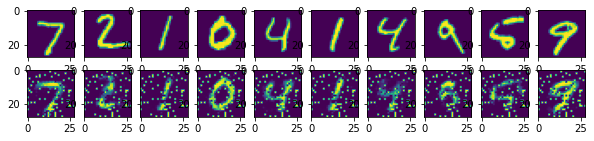

In [42]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10,2))

for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  a[1][i].imshow(np.reshape(encode_decode[i], (28,28)))